## Gather

In [3]:
import requests
import pandas as pd
import tweepy
import json
import time
import matplotlib.pyplot as plt

In [4]:
# Given file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
#tweet id for accessing API
tweet_id_ =list(twitter_archive['tweet_id'])

In [4]:
#Credentials for accessing API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
#Storing data from API
working =[]
not_working = []
with open('tweet_json.txt', 'w') as file:
    t = time.process_time()
    for tweet_id in tweet_id_:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            working.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            not_working.append(tweet_id)
    elapsed_time = time.process_time()-t
    print(elapsed_time)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 68
78.65329700000001


In [6]:
#Download image_predictions file
with open('image_predictions.tsv' , 'wb') as file:
    image_f = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    file.write(image_f.content)

In [5]:
#Reading JSON content as pandas dataframe
tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [6]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
#req. copies
tweet_data_copy = tweet_data.copy()
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy= image_predictions.copy()

## Assess

In [8]:
pd.set_option('display.max_columns', 31)

In [9]:
tweet_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39400,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8805,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33722,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6453,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25394,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4279,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42750,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40915,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9683,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20511,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,3222,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12029,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,2132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66560,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,19493,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 89

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [ ]:
#list of tweet id which were unavailable in API
not_working

In [ ]:
#content which was unaccessible through API
twitter_archive.loc[twitter_archive['tweet_id'].isin(not_working),]


*All the tweets in not working are retweets*

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2350
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2351 non-null datetime64[ns]
display_text_range               2351 non-null object
entities                         2351 non-null object
extended_entities                2072 non-null object
favorite_count                   2351 non-null int64
favorited                        2351 non-null bool
full_text                        2351 non-null object
geo                              0 non-null float64
id                               2351 non-null int64
id_str                           2351 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [14]:
#for visually comparing observation of 'user' variable
tweet_data.user[0]

{'contributors_enabled': False,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Only Legit Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'weratedogs.com',
     'expanded_url': 'http://weratedogs.com',
     'indices': [0, 23],
     'url': 'https://t.co/N7sNNHAEXS'}]}},
 'favourites_count': 122662,
 'follow_request_sent': False,
 'followers_count': 4249673,
 'following': False,
 'friends_count': 109,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 4196983835,
 'id_str': '4196983835',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 3538,
 'location': 'MERCH↴  DM DOGS. WE WILL RATE',
 'name': 'WeRateDogs™',
 'notifications': False,
 'profile_background_color': '000000',
 'profil

In [15]:
#for visually comparing observation of 'user' variable
tweet_data.user[31]

{'contributors_enabled': False,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Only Legit Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'weratedogs.com',
     'expanded_url': 'http://weratedogs.com',
     'indices': [0, 23],
     'url': 'https://t.co/N7sNNHAEXS'}]}},
 'favourites_count': 122662,
 'follow_request_sent': False,
 'followers_count': 4249676,
 'following': False,
 'friends_count': 109,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 4196983835,
 'id_str': '4196983835',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 3539,
 'location': 'MERCH↴  DM DOGS. WE WILL RATE',
 'name': 'WeRateDogs™',
 'notifications': False,
 'profile_background_color': '000000',
 'profil

In [16]:
#check for diff value than what is visually available
tweet_data[tweet_data['truncated'] != False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [17]:
#check for diff value than what is visually available
tweet_data[tweet_data['contributors'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [18]:
#check for diff value than what is visually available
tweet_data[tweet_data['coordinates'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [19]:
#check for diff value than what is visually available
tweet_data[tweet_data['geo'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [20]:
#check for diff value than what is visually available
tweet_data[(tweet_data['possibly_sensitive'].notnull()) & (tweet_data['possibly_sensitive'] !=0)]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [21]:
#check for diff value than what is visually available
tweet_data[tweet_data['retweeted'] == True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [22]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [23]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [24]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_numerator'] < 5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None


In [25]:
#observations for multiple dog stages
twitter_archive[(twitter_archive['doggo'] != 'None') & (twitter_archive['floofer'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [26]:
#observations for multiple dog stages
twitter_archive[(twitter_archive['doggo'] != 'None') & (twitter_archive['puppo'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [27]:
#observations for multiple dog stages
twitter_archive[(twitter_archive['doggo'] != 'None') & (twitter_archive['pupper'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [28]:
#unusual names
twitter_archive[twitter_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [29]:
twitter_archive[twitter_archive['text'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
#Tweets with images.
tweet_data[tweet_data['extended_entities'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39400,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8805,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33722,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6453,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25394,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4279,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42750,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40915,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9683,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20511,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,3222,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12029,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,2132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66560,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,19493,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 89

In [31]:
#Orignal Tweets 
tweet_data[tweet_data['retweeted_status'].isnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39400,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8805,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33722,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6453,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25394,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4279,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42750,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40915,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9683,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20511,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,3222,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12029,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,2132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66560,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,19493,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 89

In [32]:
#reply tweets
tweet_data[tweet_data['in_reply_to_status_id'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,117,False,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,886267009285017600,886267009285017600,NonWhiteHat,8.862664e+17,8.862664e+17,2.281182e+09,2.281182e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,129,False,@roushfenway These are good dogs but 17/10 is ...,NaN,881633300179243008,881633300179243008,roushfenway,8.816070e+17,8.816070e+17,4.738443e+07,4.738443e+07,False,en,None,NaN,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,316,False,@RealKentMurphy 14/10 confirmed,NaN,879674319642796034,879674319642796032,RealKentMurphy,8.795538e+17,8.795538e+17,3.105441e+09,3.105441e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
112,NaN,NaN,2017-06-02 19:38:25,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,121,False,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,870726314365509632,870726314365509632,ComplicitOwl,8.707262e+17,8.707262e+17,1.648776e+07,1.648776e+07,False,en,None,NaN,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
146,NaN,NaN,2017-05-13 16:15:35,"[17, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2348,False,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,863427515083354112,863427515083354112,Jack_Septic_Eye,8.634256e+17,8.634256e+17,7.759620e+07,7.759620e+07,False,en,None,NaN,NaN,NaN,NaN,NaN,105,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
147,NaN,NaN,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863079538779013120, 'id_str'...",9064,False,Ladies and gentlemen... I found Pipsy. He may ...,NaN,863079547188785154,863079547188785152,dog_rates,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,False,en,None,0.0,0.0,NaN,NaN,NaN,1185,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
176,NaN,NaN,2017-04-26 12:48:51,"[10, 28]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,240,False,@Marc_IRL pixelated af 12/10,NaN,857214891891077121,857214891891077120,Marc_IRL,8.571567e+17,8.571567e+17,1.806710e+08,1.806710e+08,False,en,None,NaN,NaN,NaN,NaN,NaN,20,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
181,NaN,NaN,2017-04-24 15:13:52,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 856526604033556482, 'id_str'...",12395,False,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,856526610513747968,856526610513747968,dog_rates,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,False,en,None,0.0,0.0,NaN,NaN,NaN,2041,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
183,NaN,NaN,2017-04-23 23:26:03,"[28, 165]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,539,

In [33]:
#for visually comparing entities and extended entities
tweet_data['entities'][13]

{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/f8dEDcrKSR',
   'expanded_url': 'https://twitter.com/dog_rates/status/889638837579907072/photo/1',
   'id': 889638825424826374,
   'id_str': '889638825424826374',
   'indices': [92, 115],
   'media_url': 'http://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
   'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1201},
    'medium': {'h': 1200, 'resize': 'fit', 'w': 901},
    'small': {'h': 680, 'resize': 'fit', 'w': 510},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/f8dEDcrKSR'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

In [34]:
#for visually comparing entities and extended entities
tweet_data['extended_entities'][13]

{'media': [{'display_url': 'pic.twitter.com/f8dEDcrKSR',
   'expanded_url': 'https://twitter.com/dog_rates/status/889638837579907072/photo/1',
   'id': 889638825424826374,
   'id_str': '889638825424826374',
   'indices': [92, 115],
   'media_url': 'http://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
   'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1201},
    'medium': {'h': 1200, 'resize': 'fit', 'w': 901},
    'small': {'h': 680, 'resize': 'fit', 'w': 510},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/f8dEDcrKSR'},
  {'display_url': 'pic.twitter.com/f8dEDcrKSR',
   'expanded_url': 'https://twitter.com/dog_rates/status/889638837579907072/photo/1',
   'id': 889638825424809984,
   'id_str': '889638825424809984',
   'indices': [92, 115],
   'media_url': 'http://pbs.twimg.com/media/DFihzFfXcAAMRKN.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DFihzFfX

In [35]:
#sample observation of source variable
tweet_data['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [36]:
#first 15 obs.
image_predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [37]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
#unique lang observations
set(tweet_data['lang'].tolist())

{'en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'}

In [39]:
#Check how actually wriiten
tweet_data.loc[tweet_data['lang']=='nl', 'full_text']

1654    aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...
1881      ER... MER... GERD 13/10 https://t.co/L1puJISV1a
2273              Ermergerd 12/10 https://t.co/PQni2sjPsm
Name: full_text, dtype: object

In [40]:
#Check how actually wriiten
tweet_data.loc[tweet_data['lang']=='in', ['full_text','id']]

,full_text,id
162,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,860177593139703809
865,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,761672994376806400
1661,NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,682697186228989953


In [41]:
#Check how actually wriiten
tweet_data.loc[tweet_data['lang']=='eu', ['full_text','id']]

,full_text,id
977,Duuun dun... duuun dun... dunn dun. dunn dun....,749403093750648834


In [42]:
#Check how actually wriiten
tweet_data.loc[tweet_data['lang']=='et', ['full_text','id']]

,full_text,id
2279,*takes several long deep breaths* omg omg oMG ...,667192066997374976


### tweet_data:

##### Quality issues:

1. id and id_str both read as integer and are different in some observations.
2. in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str read as float.
3. quoted_status_id and quoted_status_id_str read as float.
4. Same data for user in all observation.
5. No data/single value for truncated, contributors, coordinates, geo, possibly_sensitive.
6. Source variable has some prefix and suffix
7. lang(language) should be a categorical variable, read as string.



##### Tidiness issues:
1. Data spread in three tables
2. Matching data in twitter_archive and tweet_data.


### twitter_archive:

   - Addresed:


1. Rating ignores decimal

    1. 832215909146226688: 75 inplace of 9.75
    2. 680494726643068929 26 inplace of 11.26
    3. 778027034220126208 : 27 inplace of 11.27

2. Rating just takes the first fraction without checking

    1. 835246439529840640 960/0 not a rating
    2. 716439118184652801 rating not 50/50. Actual rating 11/10
    3. 666287406224695296 rating not 1/2, actual rating 9/10.

3. Data have reply tweets in which rating is changed thus making two observations about same dog and also making the first rating obsolete
    1. 684222868335505415 121/110 updated to 684225744407494656 :143/130 

4. tweet_id read as integer.
5. 667192066997374976 :English Language, not 'et'
6. 860177593139703809, 761672994376806400: English language, not 'in'
7. 682697186228989953: Zulu language(wordings from Song Circle of Life in movie The Lion King)

   - Not addressed:

13. a, an, the used as names.
14. 704054845121142784 wrong name "a", rating of 5 dogs, category :puppers
15. 770414278348247044 : Name Al instead of Al Cabone, 776201521193218049 : Name O instead of O'Malley, 770093767776997377 : "just" used as name.


##### Tidiness issues:
1. Dog stage(doggo, floofer, pupper, puppo) in different columns.





*note-1 tweet data Quality issues 1-6 are not addressed seperately as most of these columns are droped*

*note-2 <font color=purple>Tidiness issues are mentioned in purple color</font>*

*note-3 <font color=brown>Quality issues are mentioned in brown color</font>*


### Clean

In [43]:
pd.set_option('display.max_colwidth', 500)#To make info in colums more readable

Orignal Tweets with desired columns:
<font color=#FF7E00> Define:</font> Keep observations with retweeted status not present(orignal tweets).
Keep required columns only i.e. drop columns with all null or same values and columns which will not be used in cleaning process or analysis

<font color=#66B447>Code</font>

In [44]:
tweet_data_req =tweet_data[tweet_data['retweeted_status'].isnull()]

In [45]:
tweet_data_req = tweet_data_req[['created_at', 'extended_entities', 'favorite_count', 'full_text', 'id',
                                     'in_reply_to_status_id', 
                                     'lang','retweet_count']]

In [46]:
twitter_archive_req = twitter_archive[['tweet_id', 'rating_numerator', 'rating_denominator',
                                       'name','doggo','floofer','pupper', 'puppo']]

<font color=purple>
1. Tweet_id and associated data in tweet_data and twitter_archive</font>

<font color=#FF7E00> Define:</font>
Join twitter_archive_req and tweet_data_clean

<font color=#66B447>Code</font>

In [47]:
tweet_data_req = tweet_data_req.rename(columns= {'id': 'tweet_id'})

In [48]:
tweet_complete =  pd.merge(tweet_data_req, twitter_archive_req, on='tweet_id', how='left')

<font color=#2F847C>Test</font>

In [49]:
tweet_complete.sample(10)

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1341,2016-01-23 02:53:03,"{'media': [{'id': 690728920233218049, 'id_str': '690728920233218049', 'indices': [85, 108], 'media_url': 'http://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg', 'url': 'https://t.co/qOD4G19A2u', 'display_url': 'pic.twitter.com/qOD4G19A2u', 'expanded_url': 'https://twitter.com/dog_rates/status/690728923253055490/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 399, 'h': 716, 'resize': 'fit'}, 'medium': {'w': 399, 'h': 716, 're...",2372,This is Vinscent. He was just questioned about his recent credit card spending. 8/10 https://t.co/qOD4G19A2u,690728923253055490,NaN,en,595,8,10,Vinscent,None,None,None,None
403,2016-12-28 00:52:25,"{'media': [{'id': 813910431769251840, 'id_str': '813910431769251840', 'indices': [94, 117], 'media_url': 'http://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg', 'url': 'https://t.co/z1VRj1cYZf', 'display_url': 'pic.twitter.com/z1VRj1cYZf', 'expanded_url': 'https://twitter.com/dog_rates/status/813910438903693312/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1071, '...",10280,This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist https://t.co/z1VRj1cYZf,813910438903693312,NaN,en,2175,11,10,Chubbs,doggo,None,None,None
2047,2015-11-22 03:46:11,"{'media': [{'id': 668274241842860032, 'id_str': '668274241842860032', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg', 'url': 'https://t.co/3j9kZRcpVB', 'display_url': 'pic.twitter.com/3j9kZRcpVB', 'expanded_url': 'https://twitter.com/dog_rates/status/668274247790391296/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, ...",878,Meet Sophie. Her son just got in the car to leave for college. Very touching. Perfect dramatic sunlight. 10/10 yaass https://t.co/3j9kZRcpVB,668274247790391296,NaN,en,248,10,10,Sophie,None,None,None,None
145,2017-05-03 19:26:06,"{'media': [{'id': 859851567826169857, 'id_str': '859851567826169857', 'indices': [138, 161], 'media_url': 'http://pbs.twimg.com/media/C-7OcfvXcAEPXIC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C-7OcfvXcAEPXIC.jpg', 'url': 'https://t.co/BqSttrTuIl', 'display_url': 'pic.twitter.com/BqSttrTuIl', 'expanded_url': 'https://twitter.com/dog_rates/status/859851578198683649/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1200, 'h': 1600, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200,...",16019,Meet Trooper. He picks pup recyclables that have blown out of bins in the neighborhood and puts them back. 13/10 environmentally savvy af https://t.co/BqSttrTuIl,859851578198683649,NaN,en,3745,13,10,Trooper,None,None,None,None
158,2017-04-24 16:22:16,"{'media': [{'id': 856543816828018689, 'id_str': '856543816828018689', 'indices': [137, 160], 'media_url': 'http://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg', 'url': 'https://t.co/Bh9DtLhIBO', 'display_url': 'pic.twitter.com/Bh9DtLhIBO', 'expanded_url': 'https://twitter.com/dog_rates/status/856543823941562368/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",17047,This is Callie. She'll be your navigator today. Takes her job very seriously. Will shift for you. One ear always in the pupholder. 12/10 https://t.co/Bh9DtLhIBO,856543823941562368,NaN,en,3105,12,10,Callie,None,None,None,None
1788,2015-12-06 03:24:51,"{'media': [{'id': 673342302996340736, 'id_str': '673342302996340736', 'indices': [54, 77], 'media_url': 'http://pbs.twimg.com/medi

<font color=darkblue>Data contains reply tweets</font>

<font color=purple>
2. Presence of data associated to single tweet/dog in multiple observations</font>

<font color=#FF7E00> Define:</font>
Copy text and id of reply tweets to orignal tweet text so extraction and updation of rating become easy then remove the reply tweets.

<font color=#66B447>Code</font>

In [50]:
#Reasses reply tweets
tweet_complete[tweet_complete['in_reply_to_status_id'].notnull()]

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,2017-07-15 16:51:35,NaN,117,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,886267009285017600,8.862664e+17,en,4,12,10,None,None,None,None,None
52,2017-07-02 21:58:53,NaN,129,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,881633300179243008,8.816070e+17,en,7,17,10,None,None,None,None,None
61,2017-06-27 12:14:36,NaN,316,@RealKentMurphy 14/10 confirmed,879674319642796034,8.795538e+17,en,10,14,10,None,None,None,None,None
101,2017-06-02 19:38:25,NaN,121,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,870726314365509632,8.707262e+17,en,3,10,10,None,None,None,None,None
130,2017-05-13 16:15:35,NaN,2348,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",863427515083354112,8.634256e+17,en,105,12,10,None,None,None,None,None
131,2017-05-12 17:12:53,"{'media': [{'id': 863079538779013120, 'id_str': '863079538779013120', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg', 'url': 'https://t.co/lVU5GyNFen', 'display_url': 'pic.twitter.com/lVU5GyNFen', 'expanded_url': 'https://twitter.com/dog_rates/status/863079547188785154/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 749, 'h': 1035, 'resize': 'fit'}, 'small': {'w': 492, 'h': 680, '...",9064,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",863079547188785154,6.671522e+17,en,1185,14,10,None,None,None,None,None
156,2017-04-26 12:48:51,NaN,240,@Marc_IRL pixelated af 12/10,857214891891077121,8.571567e+17,en,20,12,10,None,None,None,None,None
159,2017-04-24 15:13:52,"{'media': [{'id': 856526604033556482, 'id_str': '856526604033556482', 'indices': [113, 136], 'media_url': 'http://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg', 'url': 'https://t.co/p1hBHCmWnA', 'display_url': 'pic.twitter.com/p1hBHCmWnA', 'expanded_url': 'https://twitter.com/dog_rates/status/856526610513747968/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",12395,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",856526610513747968,8.558181e+17,en,2041,14,10,None,None,None,None,None
160,2017-04-23 23:26:03,NaN,539,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,856288084350160898,8.562860e+17,en,17,14,10,None,None,None,None,None
162,2017-04-22 19:15:32,NaN,353,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,855862651834028034,8.558616e+17,en,28,420,10,None,None,None,None,None


In [51]:
tweet_complete.shape

(2175, 15)

In [52]:
#Dataframe of reply tweets.
reply_tweet = tweet_complete[tweet_complete['in_reply_to_status_id'].notnull()]

In [53]:
#Info used of reply tweets to update Ratings.
reply_tweet= reply_tweet[['tweet_id', 'in_reply_to_status_id','full_text']]

In [54]:
#Make Orignal tweet id readable and same as tweet_id variable.
reply_tweet['in_reply_to_status_id'] = reply_tweet['in_reply_to_status_id'].astype(int)

In [55]:
reply_tweet

,tweet_id,in_reply_to_status_id,full_text
29,886267009285017600,886266357075128320,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
52,881633300179243008,881607037314052096,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
61,879674319642796034,879553827334172672,@RealKentMurphy 14/10 confirmed
101,870726314365509632,870726202742493184,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
130,863427515083354112,863425645568774144,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10"
131,863079547188785154,667152164079423488,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen"
156,857214891891077121,857156678055342080,@Marc_IRL pixelated af 12/10
159,856526610513747968,855818117272018944,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA"
160,856288084350160898,856286004109553664,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10
162,855862651834028034,855861584463351808,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research


In [56]:
reply_tweet.shape

(78, 3)

In [57]:
reply_list =  list(reply_tweet['in_reply_to_status_id'])#Orignal tweet_id of reply tweets
tweet_list1 = list(tweet_complete['tweet_id'])#Combine tweet_id list
    

In [58]:
#Copy reply text to orignal text
for x in reply_list:
    if x in tweet_list1:
        ind1 = tweet_complete.index[tweet_complete['tweet_id'] == x].tolist()
        ind2 = reply_tweet.index[reply_tweet['in_reply_to_status_id']==x].tolist()
        
        tweet_complete.loc[ind1,'full_text'] ='{} Reply_id: {} Reply: {}'.format(tweet_complete.loc[ind1,'full_text'].item(), 
                                                       reply_tweet.loc[ind2, 'tweet_id'].item() ,
                                                       reply_tweet.loc[ind2, 'full_text'].item())
        
        
        
        

In [59]:
#Remove Reply tweets
tweet_complete = tweet_complete[tweet_complete['in_reply_to_status_id'].isnull()]

<font color=#2F847C>Test:</font>

In [60]:
tweet_complete[tweet_complete['tweet_id'].isin(reply_list)]

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
166,2017-04-22 16:18:34,NaN,27907,"I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth Reply_id: 856526610513747968 Reply: THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",855818117272018944,NaN,en,5882,13,10,None,None,None,None,None
197,2017-04-01 16:35:01,"{'media': [{'id': 848212097242615808, 'id_str': '848212097242615808', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg', 'url': 'https://t.co/DkOBbwulw1', 'display_url': 'pic.twitter.com/DkOBbwulw1', 'expanded_url': 'https://twitter.com/dog_rates/status/848212111729840128/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 454, 'resize': 'fit'}, 'medium': {'w': 1000, 'h': 667, '...",17501,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1 Reply_id: 848213670039564288 Reply: Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet",848212111729840128,NaN,en,3414,6,10,Jerry,None,None,None,None
413,2016-12-25 21:00:18,"{'media': [{'id': 813127235553071104, 'id_str': '813127235553071104', 'indices': [90, 113], 'media_url': 'http://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg', 'url': 'https://t.co/BzITyGw3JA', 'display_url': 'pic.twitter.com/BzITyGw3JA', 'expanded_url': 'https://twitter.com/dog_rates/status/813127251579564032/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, '...",13161,Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup https://t.co/BzITyGw3JA Reply_id: 813130366689148928 Reply: I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,813127251579564032,NaN,en,3619,11,10,None,doggo,None,None,None
427,2016-12-21 17:39:46,"{'media': [{'id': 811627196553035776, 'id_str': '811627196553035776', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg', 'url': 'https://t.co/IU8S0n4oxn', 'display_url': 'pic.twitter.com/IU8S0n4oxn', 'expanded_url': 'https://twitter.com/dog_rates/status/811627233043480576/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1390, 'h': 2048, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",14190,This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn Reply_id: 811647686436880384 Reply: PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,811627233043480576,NaN,en,3620,10,10,Augie,None,None,None,None
727,2016-07-29 18:53:24,"{'media': [{'id': 759099516616339456, 'id_str': '759099516616339456', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg', 'url': 'https://t.co/Cim4DSj6Oi', 'display_url': 'pic.twitter.com/Cim4DSj6Oi', 'expanded_url': 'https://twitter.com/dog_rates/status/759099523532779520/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, ...",15992,"Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi Reply_id: 844979544864018432 Reply: PUPDATE

In [61]:
tweet_complete.shape

(2097, 15)

In [62]:
tweet_complete.loc[166,'full_text']

'I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth Reply_id: 856526610513747968 Reply: THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA'

<font color=brown>
3. obsolete rating of dog</font>

<font color=brown>
4. Existing Rating Numerator ignores decimal</font>

<font color=brown>
5. Rating 1/2 in observation with tweet_id:666287406224695296 (caused due to selection of only the first fraction)</font>

<font color=#FF7E00> Define:</font> Use extractall instead of extract in order to get all ratings/fractions mentioned in full_text variable then assign new rating numerator and denominator which also accepts decimal ratings. In general the second fraction appearing in full_text is the actual/upgraded rating, therefore assign the second fraction as rating in observations having more than fraction in full_text variable then cross check manually. Finally remove the existing rating numerator and denominator.

<font color=#66B447>Code</font>

In [63]:
tweet_complete['Rating'] = tweet_complete.full_text.str.extractall('([\d]+[.]*\d*\/\d+)').xs(0,level='match')


In [64]:
update_rating = tweet_complete.full_text.str.extractall('([\d]+[.]*\d*\/\d+)').xs(1,level='match')


In [65]:
for ind3 in update_rating.index.tolist():
    tweet_complete.loc[ind3,'Rating']= update_rating.loc[ind3].item()

In [66]:
#Test Rating variable created
tweet_complete

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Rating
0,2017-08-01 16:23:56,"{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'res...",39400,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,NaN,en,8805,13,10,Phineas,None,None,None,None,13/10
1,2017-08-01 00:17:27,"{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",33722,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,NaN,en,6453,13,10,Tilly,None,None,None,None,13/10
2,2017-07-31 00:18:03,"{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",25394,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,NaN,en,4279,12,10,Archie,None,None,None,None,12/10
3,2017-07-30 15:58:51,"{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ', 'display_url': 'pic.twitter.com/tD36da7qLQ', 'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'r...",42750,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,NaN,en,8890,13,10,Darla,None,None,None,None,13/10
4,2017-07-29 16:00:24,"{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 're...",40915,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,NaN,en,9683,12,10,Franklin,None,None,None,None,12/10
5,2017-07-29 00:08:17,"{'media': [{'id': 891087942176911360, 'id_str': '891087942176911360', 'indices': [139, 162], 'media_url'

In [67]:
#Full text of observations which got second fraction assigned as rating for manual cross check.
tweet_complete.loc[update_rating.index.tolist(),'full_text']

166                                I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth Reply_id: 856526610513747968 Reply: THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA
197     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1 Reply_id: 848213670039564288 Reply: Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet
413                                                          Here's an anonymous doggo that appears to be very done with Christmas. 11/10 cheer up pup https://t.co/BzITyGw3JA Reply_id: 813130366689148928 Reply: I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa a

In [68]:
tweet_complete.loc[1420,'Rating'] = '12/10'
tweet_complete.loc[1485,'Rating'] = '12/10'
tweet_complete.loc[1791,'Rating'] = '8/10'
tweet_complete.loc[1831,'Rating'] = '10/10'

In [69]:
#creating new variable
tweet_complete['Rating_Numerator'], tweet_complete['Rating_Denominator'] = tweet_complete['Rating'].str.split('/').str

In [70]:
#droping the old ratings
tweet_complete = tweet_complete.drop(['rating_denominator', 'rating_numerator','Rating'], axis=1)

In [71]:
tweet_complete['Rating_Numerator'] = tweet_complete['Rating_Numerator'].astype(float)

In [72]:
tweet_complete['Rating_Denominator'] = tweet_complete['Rating_Denominator'].astype(int)

<font color=#2F847C>Test:</font>

In [73]:
tweet_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2174
Data columns (total 15 columns):
created_at               2097 non-null datetime64[ns]
extended_entities        1971 non-null object
favorite_count           2097 non-null int64
full_text                2097 non-null object
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
lang                     2097 non-null object
retweet_count            2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
Rating_Numerator         2097 non-null float64
Rating_Denominator       2097 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 342.1+ KB


In [74]:
tweet_complete.loc[tweet_complete['Rating_Numerator']==11.27]

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,name,doggo,floofer,pupper,puppo,Rating_Numerator,Rating_Denominator
617,2016-09-20 00:24:34,"{'media': [{'id': 778027018185240576, 'id_str': '778027018185240576', 'indices': [138, 161], 'media_url': 'http://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg', 'url': 'https://t.co/QFaUiIHxHq', 'display_url': 'pic.twitter.com/QFaUiIHxHq', 'expanded_url': 'https://twitter.com/dog_rates/status/778027034220126208/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1023, 'h': 609, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'r...",7272,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,NaN,en,1862,Sophie,None,None,pupper,None,11.27,10


In [75]:
tweet_complete

,created_at,extended_entities,favorite_count,full_text,tweet_id,in_reply_to_status_id,lang,retweet_count,name,doggo,floofer,pupper,puppo,Rating_Numerator,Rating_Denominator
0,2017-08-01 16:23:56,"{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'res...",39400,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,NaN,en,8805,Phineas,None,None,None,None,13.0,10
1,2017-08-01 00:17:27,"{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",33722,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,NaN,en,6453,Tilly,None,None,None,None,13.0,10
2,2017-07-31 00:18:03,"{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, '...",25394,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,NaN,en,4279,Archie,None,None,None,None,12.0,10
3,2017-07-30 15:58:51,"{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ', 'display_url': 'pic.twitter.com/tD36da7qLQ', 'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'r...",42750,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,NaN,en,8890,Darla,None,None,None,None,13.0,10
4,2017-07-29 16:00:24,"{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 're...",40915,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,NaN,en,9683,Franklin,None,None,None,None,12.0,10
5,2017-07-29 00:08:17,"{'media': [{'id': 891087942176911360, 'id_str': '891087942176911360', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/med

Keeping tweets with images
<font color=#FF7E00> Define:</font> Keep observation with extended_entities only(extended_entities indicate presence of media file)

<font color=#66B447>Code</font>

In [76]:
tweet_complete =tweet_complete[tweet_complete['extended_entities'].notnull()]

Droping columns which served their purpose and will not be used for analysis.

In [77]:
tweet_complete = tweet_complete.drop(['extended_entities','in_reply_to_status_id'], axis=1)

<font color=purple>
6. Dog stage spread in 4 columns should be single variable</font>

<font color=#FF7E00> Define:</font>
1. Melt the four columns then drop the variable column.
2. For observations having all stages as None drop three of them keeping only one.
3. For observations having atleast one of the four stages drop the observation saying dogstage as None.
4. Merge the observations having multiple dog stages.
5. Drop remaining duplicates

In [78]:
#Note: Test are conducted after every step

In [79]:
tweet_complete.shape

(1971, 13)

<font color=#66B447>Code</font>

In [80]:
tweet_complete = pd.melt(tweet_complete, id_vars=['created_at','full_text','tweet_id',
                                'favorite_count','lang','retweet_count','name','Rating_Numerator','Rating_Denominator'],
       value_vars= ['doggo','floofer','pupper','puppo'],
       value_name= 'DogStage')

In [81]:
tweet_complete = tweet_complete.drop('variable', axis=1)

In [82]:
#Test1
tweet_complete.shape

(7884, 10)

Step 2:

In [83]:
tweet_complete = tweet_complete.drop_duplicates()

<font color=#2F847C>Test2:</font>

In [84]:
tweet_complete.shape

(2284, 10)

In [85]:
tweet_complete.loc[tweet_complete['tweet_id']==817777686764523521]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
337,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,doggo
2308,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,None
4279,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,pupper


In [86]:
tweet_complete.loc[tweet_complete['tweet_id']==778027034220126208]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
549,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,7272,en,1862,Sophie,11.27,10,None
4491,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,7272,en,1862,Sophie,11.27,10,pupper


Step 3

In [87]:

to_Drop = tweet_complete.loc[tweet_complete['DogStage']!='None','tweet_id'].tolist()

In [88]:
tweet_complete = tweet_complete.drop(tweet_complete.loc[(tweet_complete['tweet_id'].isin(to_Drop)) & 
                                                        (tweet_complete['DogStage']=='None')].index)

<font color=#2F847C>Test3:</font>

In [89]:
tweet_complete.shape

(1981, 10)

In [90]:
tweet_complete.loc[tweet_complete['tweet_id']==778027034220126208]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
4491,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,7272,en,1862,Sophie,11.27,10,pupper


In [91]:
tweet_complete.loc[tweet_complete['tweet_id']==817777686764523521]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
337,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,doggo
4279,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,pupper


Step 4:

In [92]:
multiple_DogStage = tweet_complete.loc[tweet_complete['tweet_id'].duplicated(keep=False)].groupby('tweet_id').groups

In [93]:
for key in multiple_DogStage.keys():
    ind4 = multiple_DogStage[key][0]
    ind5 = multiple_DogStage[key][1]
    tweet_complete.loc[ind4,'DogStage']='{},{}'.format(tweet_complete.loc[ind4,'DogStage'],tweet_complete.loc[ind5,'DogStage'])

<font color=#2F847C>Test4:</font>

In [94]:
tweet_complete.loc[tweet_complete['tweet_id']==817777686764523521]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
337,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,"doggo,pupper"
4279,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,pupper


In [95]:
tweet_complete.loc[tweet_complete['tweet_id'].duplicated(keep=False)]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
146,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,855851453814013952,47574,en,19064,None,13.0,10,"doggo,puppo"
152,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",854010172552949760,17076,en,3412,None,11.0,10,"doggo,floofer"
337,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",817777686764523521,11825,en,3063,Dido,13.0,10,"doggo,pupper"
394,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,808106460588765185,9654,en,2508,None,12.0,10,"doggo,pupper"
421,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,801115127852503040,8951,en,2407,Bones,12.0,10,"doggo,pupper"
506,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,785639753186217984,8671,en,2541,Pinot,10.0,10,"doggo,pupper"
648,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",759793422261743616,6570,en,2158,Maggie,12.0,10,"doggo,pupper"
700,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,751583847268179968,4829,en,1254,None,5.0,10,"doggo,pupper"
789,2016-06-10 00:39:48,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,741067306818797568,10270,en,3482,just,12.0,10,"doggo,pupper"
835,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda Reply_id: 802265048156610565 Reply: Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",733109485275860992,44372,en,17458,None,11.0,10,"doggo,pupper"


Step 5

In [96]:
tweet_complete = tweet_complete.drop_duplicates('tweet_id')

<font color=#2F847C>Test5:</font>

In [97]:
tweet_complete.shape

(1971, 10)

In [98]:
tweet_complete.loc[tweet_complete['tweet_id']==855851453814013952]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage
146,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,855851453814013952,47574,en,19064,None,13.0,10,"doggo,puppo"


<font color=purple>
7. Language code not understandable</font>

<font color=brown>
8. Language not 'in'</font>

<font color=#FF7E00> Define:</font> Visual check then change accordingly.

In [99]:
#Reassessment
tweet_complete.loc[tweet_complete['lang']=='in',['full_text','tweet_id']]

,full_text,tweet_id
633,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,761672994376806400
1316,NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 https://t.co/Ny4iM6FDtz,682697186228989953


<font color=#66B447>Code</font>

In [100]:
tweet_complete.loc[tweet_complete['tweet_id']==761672994376806400,'lang'] = 'English'

In [101]:
tweet_complete.loc[tweet_complete['tweet_id']==682697186228989953,'lang']= 'Zulu'

<font color=brown>
9. Language not 'et'</font>

<font color=#FF7E00> Define:</font> Visual check then change accordingly.

In [102]:
#Reassessment
tweet_complete.loc[tweet_complete['lang']=='et',['full_text','tweet_id']]

,full_text,tweet_id
1900,*takes several long deep breaths* omg omg oMG OMG OMG OMGSJYBSNDUYWJO 12/10 https://t.co/QCugm5ydl6,667192066997374976


<font color=#66B447>Code</font>

In [103]:
tweet_complete['lang'] = tweet_complete['lang'].str.replace('et', 'English')

<font color=brown>
10. Language not 'eu'</font>

<font color=#FF7E00> Define:</font> Visual check then change accordingly. Remove abbreviations for english and dutch also

In [104]:
#Reassessment
tweet_complete.loc[tweet_complete['lang']=='eu',['full_text','tweet_id']]

,full_text,tweet_id
725,Duuun dun... duuun dun... dunn dun. dunn dun. dun dun dun dun dun dun dun dun dun dun dun dun dun dun dun. 10/10 https://t.co/9qdJ2Q1Cwx,749403093750648834


<font color=#66B447>Code</font>

In [105]:
tweet_complete['lang'] = tweet_complete['lang'].str.replace('eu', 'English')

In [106]:
tweet_complete['lang'] = tweet_complete['lang'].str.replace('en', 'English')

In [107]:
tweet_complete['lang'] = tweet_complete['lang'].str.replace('nl', 'Dutch')

<font color=brown>
11. Language as categorical variable</font>

In [108]:
tweet_complete['lang']=tweet_complete['lang'].astype('category')

<font color=#2F847C>Test:</font>

In [109]:
tweet_complete['lang'].describe()

count        1971
unique          3
top       English
freq         1967
Name: lang, dtype: object

<font color=purple>
12. Predictions associated to tweet_id present seperately.</font>

<font color=#FF7E00> Define:</font> image predictions table have results of multiple algorithm for predictions of dog in every tweet_id, in reality either one of it is correct or none of them, so take prediction which says dog and have maximum confidence. If none of the algorithm used is able to predict breed of dog take the prediction of max confidence.

<font color=#66B447>Code</font>

In [110]:
image_predict= image_predictions.copy()

In [111]:
tweet_list2 = list(tweet_complete['tweet_id'])
predic_tweetid =list(image_predictions['tweet_id'])

In [112]:
for tweet_id in predic_tweetid:
    if tweet_id in tweet_list2:
        ind6 = tweet_complete.index[tweet_complete['tweet_id']==tweet_id].item()
        ind7 = image_predictions.index[image_predictions['tweet_id']==tweet_id].item()
        if image_predictions.loc[ind7,'p1_dog'].item()== True:
            tweet_complete.loc[ind6,'Predicted_Content'] = image_predictions.loc[ind7,'p1']
            tweet_complete.loc[ind6,'Is_Dog'] = True
            tweet_complete.loc[ind6,'Predict_jpg_url'] = image_predictions.loc[ind7,'jpg_url']
            tweet_complete.loc[ind6,'Predict_Confidence'] = image_predictions.loc[ind7,'p1_conf']
        elif image_predictions.loc[ind7,'p1_dog'].item() == False & image_predictions.loc[ind7,'p2_dog'].item() == True:
            tweet_complete.loc[ind6,'Is_Dog'] = True
            tweet_complete.loc[ind6,'Predicted_Content'] = image_predictions.loc[ind7,'p2']
            tweet_complete.loc[ind6,'Predict_jpg_url'] = image_predictions.loc[ind7,'jpg_url']
            tweet_complete.loc[ind6,'Predict_Confidence'] = image_predictions.loc[ind7,'p2_conf']
        elif image_predictions.loc[ind7,'p1_dog'].item() == False & image_predictions.loc[ind7,'p2_dog'].item() == False & image_predictions.loc[ind7,'p3_dog'].item()== True:
            tweet_complete.loc[ind6,'Predicted_Content'] = image_predictions.loc[ind7,'p3']
            tweet_complete.loc[ind6,'Is_Dog'] = True
            tweet_complete.loc[ind6,'Predict_jpg_url'] = image_predictions.loc[ind7,'jpg_url']
            tweet_complete.loc[ind6,'Predict_Confidence'] = image_predictions.loc[ind7,'p3_conf']
        elif image_predictions.loc[ind7,'p1_dog'].item() == False & image_predictions.loc[ind7,'p2_dog'].item() == False & image_predictions.loc[ind7,'p3_dog'].item()== False:
            tweet_complete.loc[ind6,'Predicted_Content'] = image_predictions.loc[ind7,'p1']
            tweet_complete.loc[ind6,'Is_Dog'] = False
            tweet_complete.loc[ind6,'Predict_jpg_url'] = image_predictions.loc[ind7,'jpg_url']
            tweet_complete.loc[ind6,'Predict_Confidence'] = image_predictions.loc[ind7,'p1_conf']
    

<font color=#2F847C>Test:</font>

In [113]:
tweet_complete

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage,Predicted_Content,Is_Dog,Predict_jpg_url,Predict_Confidence
0,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,39400,English,8805,Phineas,13.0,10,None,orange,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,0.097049
1,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,33722,English,6453,Tilly,13.0,10,None,Chihuahua,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,0.323581
2,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,25394,English,4279,Archie,12.0,10,None,Chihuahua,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,0.716012
3,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,42750,English,8890,Darla,13.0,10,None,paper_towel,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,0.170278
4,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,40915,English,9683,Franklin,12.0,10,None,basset,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712
5,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,891087950875897856,20511,English,3222,None,13.0,10,None,Chesapeake_Bay_retriever,True,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,0.425595
6,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,890971913173991426,12029,English,2132,Jax,13.0,10,None,Appenzeller,True,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,0.341703
7,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,890729181411237888,66560,English,19493,None,13.0,10,None,Pomeranian,True,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,0.566142
8,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,890609185150312448,28145,English,4375,Zoey,13.0,10,None,Irish_terrier,True,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,0.487574
9,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,890240255349198849,32390,English,7650,Cassie,14.0,10,doggo,Pembroke,True,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,0.511319


<font color=brown>
13. tweet_id as str.  </font>

<font color=#FF7E00> Define:</font> Change type of tweet_id from integer to string

<font color=#66B447>Code</font>

In [114]:
tweet_complete['tweet_id'] = tweet_complete['tweet_id'].astype(str)

<font color=#2F847C>Test:</font>

In [115]:
tweet_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 6720
Data columns (total 14 columns):
created_at            1971 non-null datetime64[ns]
full_text             1971 non-null object
tweet_id              1971 non-null object
favorite_count        1971 non-null int64
lang                  1971 non-null category
retweet_count         1971 non-null int64
name                  1971 non-null object
Rating_Numerator      1971 non-null float64
Rating_Denominator    1971 non-null int64
DogStage              1971 non-null object
Predicted_Content     1971 non-null object
Is_Dog                1971 non-null object
Predict_jpg_url       1971 non-null object
Predict_Confidence    1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 297.6+ KB


In [116]:
pd.reset_option('display.max_colwidth')

### Storing

In [117]:
tweet_complete.to_csv('twitter_archive_master.csv', index=False )

### Insights and Visualisation

In [118]:
tweet_complete.groupby(tweet_complete['created_at'].dt.weekday_name).agg(['median','count'])

favorite_count       retweet_count       Rating_Numerator        \
                   median count        median count           median count   
created_at                                                                   
Friday             4339.0   279        1431.0   279             11.0   279   
Monday             3969.5   326        1274.5   326             11.0   326   
Saturday           3799.0   248        1168.0   248             11.0   248   
Sunday             3722.5   254        1301.5   254             11.0   254   
Thursday           4109.0   280        1365.5   280             11.0   280   
Tuesday            4521.0   291        1450.0   291             11.0   291   
Wednesday          4208.0   293        1449.0   293             11.0   293   

           Rating_Denominator       Predict_Confidence        
                       median count             median count  
created_at                                                    
Friday                     10   279           0.581403   279  
Monday                     10   326           0.553974   326  
Saturday                   10   248           0.610554   248  
Sunday                     10   254           0.606468   254  
Thursday                   10   280           0.596669   280  
Tuesday                    10   291           0.586414   291  
Wednesday                  10   293           0.623685   293

1. Least tweeting on Saturday. Tuesday, Wednesday and Friday sees higher retweets and favourite counts.

In [119]:
tweet_complete.loc[:,['retweet_count','favorite_count']].max()

retweet_count      78916
favorite_count    132026
dtype: int64

In [120]:
tweet_complete.loc[tweet_complete['retweet_count']==78916]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage,Predicted_Content,Is_Dog,Predict_jpg_url,Predict_Confidence
769,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,744234799360020481,130293,English,78916,None,13.0,10,doggo,Labrador_retriever,True,https://pbs.twimg.com/ext_tw_video_thumb/74423...,0.825333


2 Labrador_retriever doggo swimming and standing in pool got max retweets.

In [121]:
tweet_complete.loc[tweet_complete['favorite_count']==132026]

,created_at,full_text,tweet_id,favorite_count,lang,retweet_count,name,Rating_Numerator,Rating_Denominator,DogStage,Predicted_Content,Is_Dog,Predict_jpg_url,Predict_Confidence
6219,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,822872901745569793,132026,English,47823,None,13.0,10,puppo,Lakeland_terrier,True,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,0.196015


In [122]:
visual = tweet_complete.groupby([tweet_complete['created_at'].dt.year,tweet_complete['created_at'].dt.month]).agg(['median','count'])

visual

favorite_count       retweet_count        \
                              median count        median count   
created_at created_at                                            
2015       11                  562.0   295         238.0   295   
           12                 1827.0   360         694.5   360   
2016       1                  2864.0   166         940.0   166   
           2                  2985.5   108        1028.0   108   
           3                  3400.0   118        1076.5   118   
           4                  4463.5    54        1415.5    54   
           5                  4337.0    56        1340.0    56   
           6                  5720.0    79        1789.0    79   
           7                  5728.0    88        1810.5    88   
           8                  6985.0    59        2009.0    59   
           9                  9777.0    63        3102.0    63   
           10                10945.0    65        3262.0    65   
           11                11329.0    52        3125.0    52   
           12                11069.5    54        2948.0    54   
2017       1                 13375.0    66        3005.5    66   
           2                 14735.5    64        3272.5    64   
           3                 19512.0    47        4128.0    47   
           4                 21540.0    40        5108.0    40   
           5                 22945.0    42        5363.5    42   
           6                 24209.0    44        4363.5    44   
           7                 28362.0    49        5562.0    49   
           8                 36561.0     2        7629.0     2   

                      Rating_Numerator       Rating_Denominator        \
                                median count             median count   
created_at created_at                                                   
2015       11                     10.0   295                 10   295   
           12                     10.0   360                 10   360   
2016       1                      10.0   166                 10   166   
           2                      10.0   108                 10   108   
           3                      11.0   118                 10   118   
           4                      11.0    54                 10    54   
           5                      11.0    56                 10    56   
           6                      10.0    79                 10    79   
           7                      11.0    88                 10    88   
           8                      11.0    59                 10    59   
           9                      11.0    63                 10    63   
           10                     12.0    65                 10    65   
           11                     12.0    52                 10    52   
           12                     12.0    54                 10    54   
2017       1                      12.0    66                 10    66   
           2                      12.0    64                 10    64   
           3                      12.0    47                 10    47   
           4                      12.0    40                 10    40   
           5                      13.0    42                 10    42   
           6                      13.0    44                 10    44   
           7                      13.0    49                 10    49   
           8                      13.0     2                 10     2   

                      Predict_Confidence        
                                  median count  
created_at created_at                           
2015       11                   0.495047   295  
           12                   0.583088   360  
2016       1                    0.508966   166  
           2                    0.522071   108  
           3                    0.718961   118  
           4                    0.591828    54  
           5                    0.519555    56  
           6                    0.589066    79  
      

3 Over the time, amount of tweets per month decreased and popularity(retweets and favourites) increased

4 With time median rating of dogs has increased, initially around 10 became around 13 in two years. This may be because this account created an enthusiasm in audience to be more innovative with their dogs or may be because user has become more generous over time or maybe he/she is doing an initial screening before posting. 

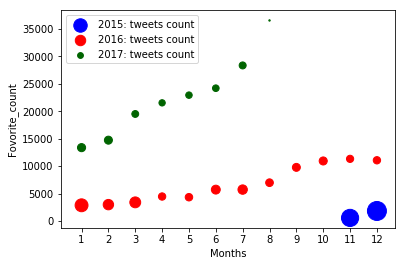

In [123]:
ax = visual['favorite_count'].loc[2015].reset_index().plot.scatter(x ='created_at',y='median',c='blue',s=visual['favorite_count','count'] , xticks=range(1,13), label='2015: tweets count')
ax1 = visual['favorite_count'].loc[2016].reset_index().plot.scatter(x ='created_at',y='median',c='red',s=visual['favorite_count','count'].loc[2016] , xticks=range(1,13),label='2016: tweets count',ax=ax )
visual['favorite_count'].loc[2017].reset_index().plot.scatter(x ='created_at',y='median',c='darkgreen',s=visual['favorite_count','count'].loc[2017], xticks=range(1,13),label='2017: tweets count',ax=ax1 )
ax.set(xlabel='Months', ylabel='Fovorite_count')
plt.show()

The size of circle indicated the relative no. of tweets in a month, the graph shows year wise how no. of tweets made decreased and the fovorite count increased over time.

In [124]:
tweet_complete.loc[tweet_complete['Is_Dog']==True].groupby(tweet_complete['Predicted_Content']).agg(['count','median'])

favorite_count          retweet_count          \
                                        count   median         count  median   
Predicted_Content                                                              
Afghan_hound                                3  17181.0             3  5263.0   
Airedale                                   12   3012.5            12   982.5   
American_Staffordshire_terrier             13   5894.0            13  1692.0   
Appenzeller                                 2   7300.0             2  1443.5   
Australian_terrier                          2  11071.5             2  3047.5   
Bedlington_terrier                          5  13790.0             5  2530.0   
Bernese_mountain_dog                       10   4969.5            10  1453.0   
Blenheim_spaniel                           10   3602.5            10   998.0   
Border_collie                              12   4103.0            12  1238.0   
Border_terrier                              7  13372.0             7  2335.0   
Boston_bull                                 9   2904.0             9   890.0   
Brabancon_griffon                           3    988.0             3   273.0   
Brittany_spaniel                            7   2646.0             7   665.0   
Cardigan                                   17  10544.0            17  2786.0   
Chesapeake_Bay_retriever                   23   5722.0            23  1814.0   
Chihuahua                                  78   2933.5            78   932.0   
Dandie_Dinmont                              6   2908.5             6   874.5   
Doberman                                    8   7528.0             8  1567.5   
English_setter                              7   1661.0             7   727.0   
English_springer                            9   2219.0             9   578.0   
EntleBucher                                 1   2670.0             1   698.0   
Eskimo_dog                                 18   5373.0            18  1399.5   
French_bulldog                             26  10362.0            26  2736.0   
German_shepherd                            20   7104.5            20  1868.5   
German_short-haired_pointer                 7   2571.0             7   717.0   
Gordon_setter                               4   4121.0             4   984.5   
Great_Dane                                  9   4457.0             9  1318.0   
Great_Pyrenees                             14   6916.5            14  2025.5   
Greater_Swiss_Mountain_dog                  3   7680.0             3  1684.0   
Ibizan_hound                                3    791.0             3   314.0   
...                                       ...      ...           ...     ...   
cocker_spaniel                             27   8426.0            27  2026.0   
collie                                     10   3614.0            10   957.5   
curly-coated_retriever                      3   1816.0             3   516.0   
dalmatian                                  12   5003.0            12  1375.0   
flat-coated_retriever                       8  15003.5             8  2890.0   
giant_schnauzer                             2  17211.5             2  5108.5   
golden_retriever                          137   8222.0           137  2277.0   
groenendael                                 1   1885.0             1   413.0   
keeshond                                    4   4751.5             4  1457.5   
kelpie                                     11   9466.0            11  2430.0   
komondor                                    3   7989.0             3  2069.0   
kuvasz                                     15   4950.0            15  1686.0   
malamute                                   29   6976.0            29  2166.0   
malinois                                    9   3018.0             9  1307.0   
miniature_pinscher                         21   3860.0            21  1522.0   
miniature_poodle                            8   2398.0             8   852.5   
miniature_schnauzer            

5  Breed golden retriever has maximum no. of tweets(137)